#### 堆 heap

堆排序：
* 空间复杂度 O(1) -> 原地排序
* 时间复杂度 O(nlogn)。
* 不稳定排序


* 堆是一个完全二叉树；
* 堆中每一个节点的值都必须大于等于（或小于等于）其子树中每个节点的值。
  * 左子树的所有节点的值不一定都小于(或大于)右子树的值


* 大顶堆：对于每个节点的值都大于等于子树中每个节点值的堆
* 小顶堆：对于每个节点的值都小于等于子树中每个节点值的堆


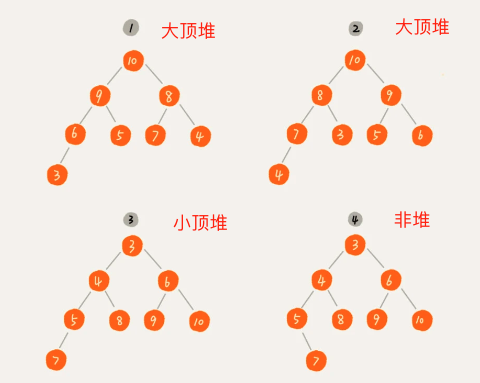


##### FAQ
为什么快速排序要比堆排序性能好？
1. 对于快速排序来说，数据是顺序访问的；而对于堆排序来说，数据是跳着访问的，这样对 CPU 缓存是不友好的。
   1. 比如，堆排序中，最重要的一个操作就是数据的堆化。比如下面这个例子，对堆顶节点进行堆化，会依次访问数组下标是 1，2，4，8 的元素，而不是像快速排序那样，局部顺序访问，所以，这样对 CPU 缓存是不友好的。
2. 对于同样的数据，在排序过程中，堆排序算法的数据交换次数要多于快速排序。
   1. 我们在讲排序的时候，提过两个概念，有序度和逆序度。
   2. 对于基于比较的排序算法来说，整个排序过程就是由两个基本的操作组成的，比较和交换（或移动）。快速排序数据交换的次数不会比逆序度多。但是堆排序的第一步是建堆，建堆的过程会打乱数据原有的相对先后顺序，导致原数据的有序度降低。比如，对于一组已经有序的数据来说，经过建堆之后，数据反而变得更无序了。
   
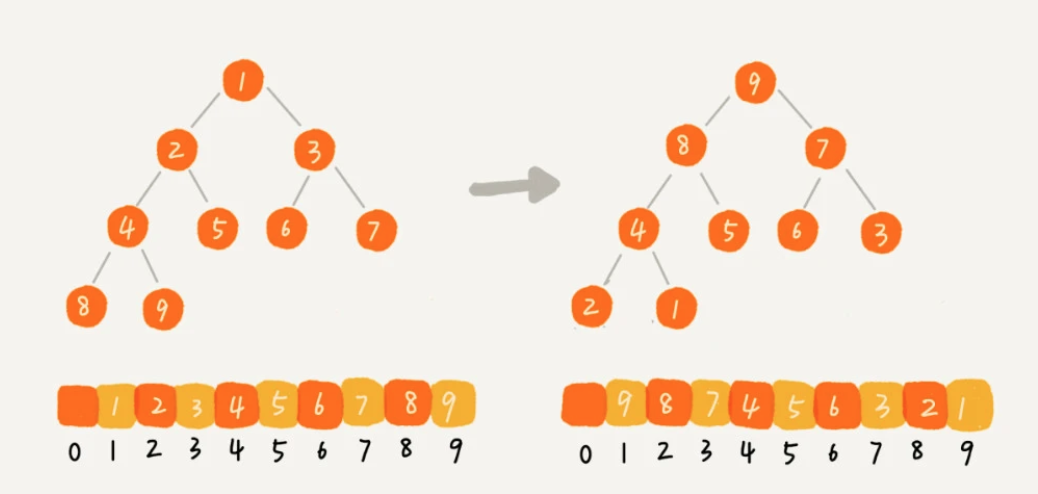

#### 实现一个堆

完全二叉树比较适合用数组来存储。

用数组来存储完全二叉树是非常节省存储空间的。因为我们不需要存储左右子节点的指针，单纯地通过数组的下标，就可以找到一个节点的左右子节点和父节点。

数组中下标为 i 的节点的左子节点，就是下标为 i\*2 的节点，右子节点就是下标为 i\*2+1 的节点，父节点就是下标为 i/2​ 的节点。

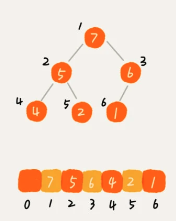

#### 堆化 heapify

一个包含 n 个节点的完全二叉树，树的高度不会超过 $\log_{2}(n)$。

堆化的过程是顺着节点所在路径比较交换的，所以堆化的时间复杂度跟树的高度成正比，也就是 O(logn)。

插入数据和删除堆顶元素的主要逻辑就是堆化，所以，往堆中插入一个元素和删除堆顶元素的时间复杂度都是 *O(logn)*。

##### 新增：从下往上

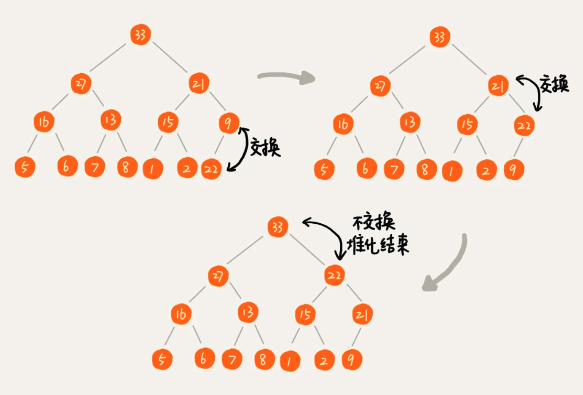


~~~

public class Heap {
  private int[] a; // 数组，从下标1开始存储数据
  private int n;  // 堆可以存储的最大数据个数
  private int count; // 堆中已经存储的数据个数

  public Heap(int capacity) {
    a = new int[capacity + 1]; // 0 位不放元素
    n = capacity;
    count = 0;
  }

  public void insert(int data) {
    if (count >= n) return; // 堆满了
    ++count;
    a[count] = data;
    int i = count;
    while (i/2 > 0 && a[i] > a[i/2]) { // 自下往上堆化
      swap(a, i, i/2); // swap()函数作用：交换下标为i和i/2的两个元素
      i = i/2;
    }
  }
 }
~~~

##### 删除堆顶元素：自上而下

堆顶元素为最大/小元素，把第二大/小的元素放到堆顶

这种方式会有数组空洞，导致不满足完全二叉树的要求
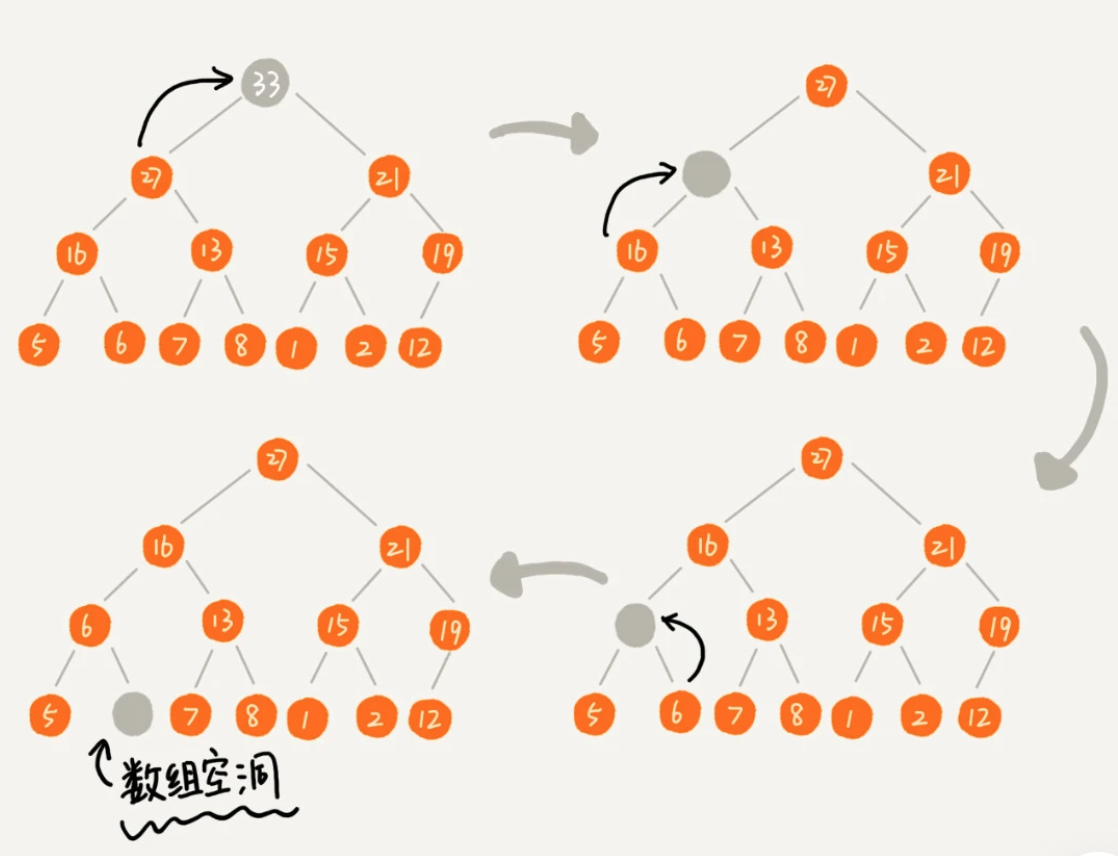

优化：
* 把最后一个节点放到堆顶，后续都是交换操作，所以不会出现数组中的黑洞
* 再利用父子节点对比的方法，对于不满足父子节点大小挂你的，互换两个节点，并且重复进行这个过程，知道父子节点之间满足大小关系为止。
* 这就是*自上往下的堆化*

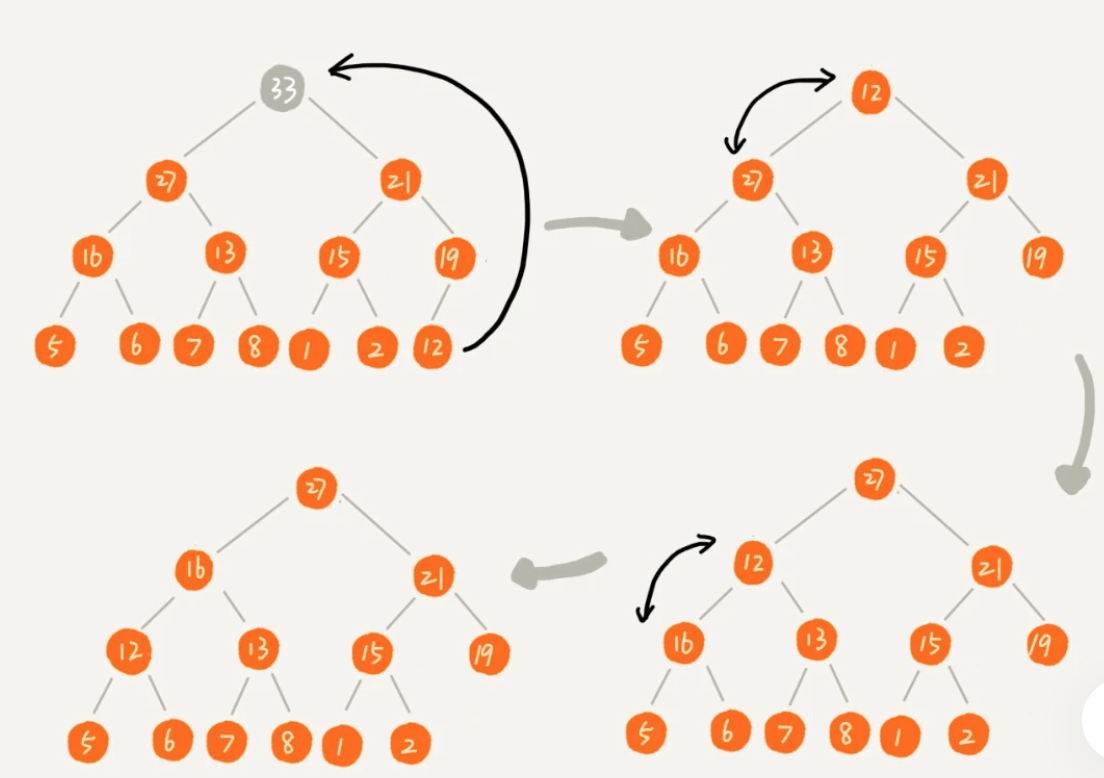

~~~

public void removeMax() {
  if (count == 0) return -1; // 堆中没有数据
  a[1] = a[count];
  --count;
  heapify(a, count, 1);
}

// 调整 index i 为堆顶的子树
private void heapify(int[] a, int n, int i) { // 自上往下堆化
  while (true) {

    // 找出堆顶元素和其左右节点的最大元素和index
    int maxPos = i;
    if (i*2 <= n && a[i] < a[i*2]) maxPos = i*2;
    if (i*2+1 <= n && a[maxPos] < a[i*2+1]) maxPos = i*2+1;
    if (maxPos == i) break;

    swap(a, i, maxPos);
    i = maxPos;
  }
}

~~~



#### 堆排序

* 空间复杂度 O(1) -> 原地排序
* 时间复杂度 O(nlogn)。
* 不稳定排序

##### 建堆

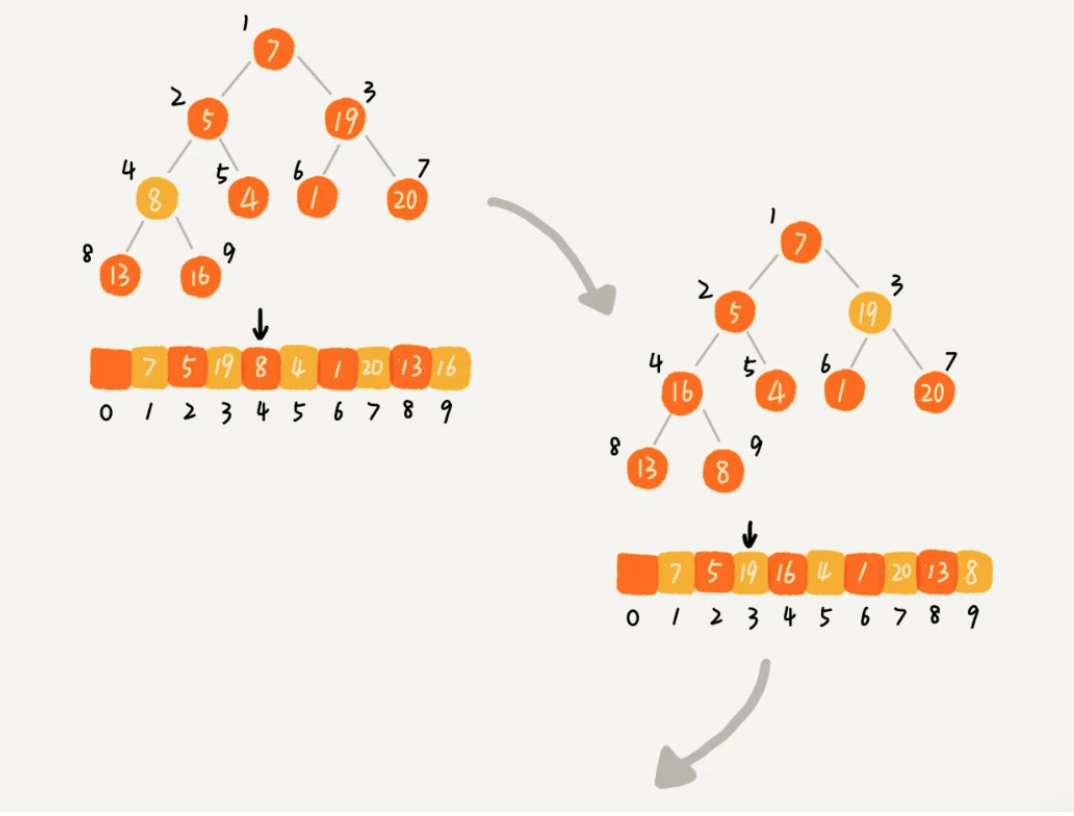
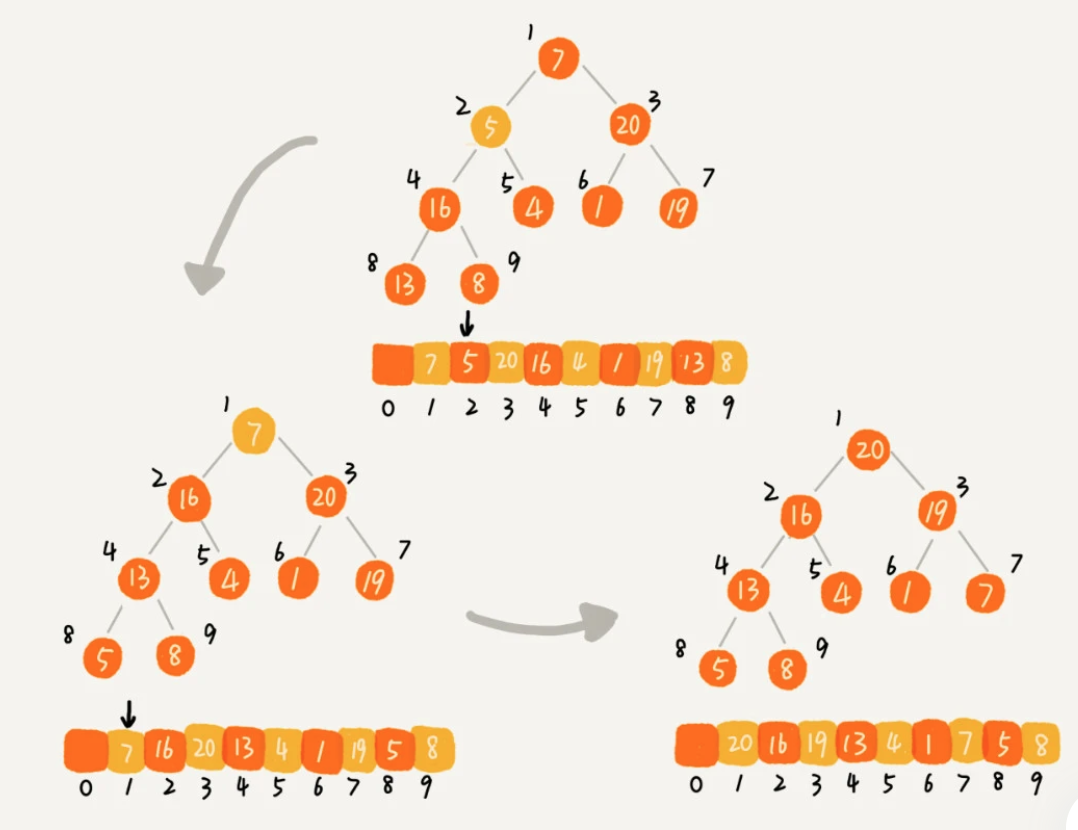


* 对于完全二叉树来说，$n \over 2$ + 1 到 n 的节点都是叶子节点
* 因为叶子节点往下堆化只能自己跟自己比较，所以我们直接从最后一个非叶子节点开始依次堆化
* 要把大的元素从下往上推，所以从下标 $\frac{n}{2}$ 开始到 $1$ 的数据进行堆化


~~~

private static void buildHeap(int[] a, int n) {
  for (int i = n/2; i >= 1; --i) {
    heapify(a, n, i);
  }
}

private static void heapify(int[] a, int n, int i) {
  while (true) {
    int maxPos = i;
    if (i*2 <= n && a[i] < a[i*2]) maxPos = i*2;
    if (i*2+1 <= n && a[maxPos] < a[i*2+1]) maxPos = i*2+1;
    if (maxPos == i) break;
    swap(a, i, maxPos);
    i = maxPos;
  }
}

~~~


##### 建堆时间复杂度 O(n)

把每一层的节点个数和对应的高度画了出来，你可以看看。我们只需要将每个节点的高度求和，得出的就是建堆的时间复杂度。

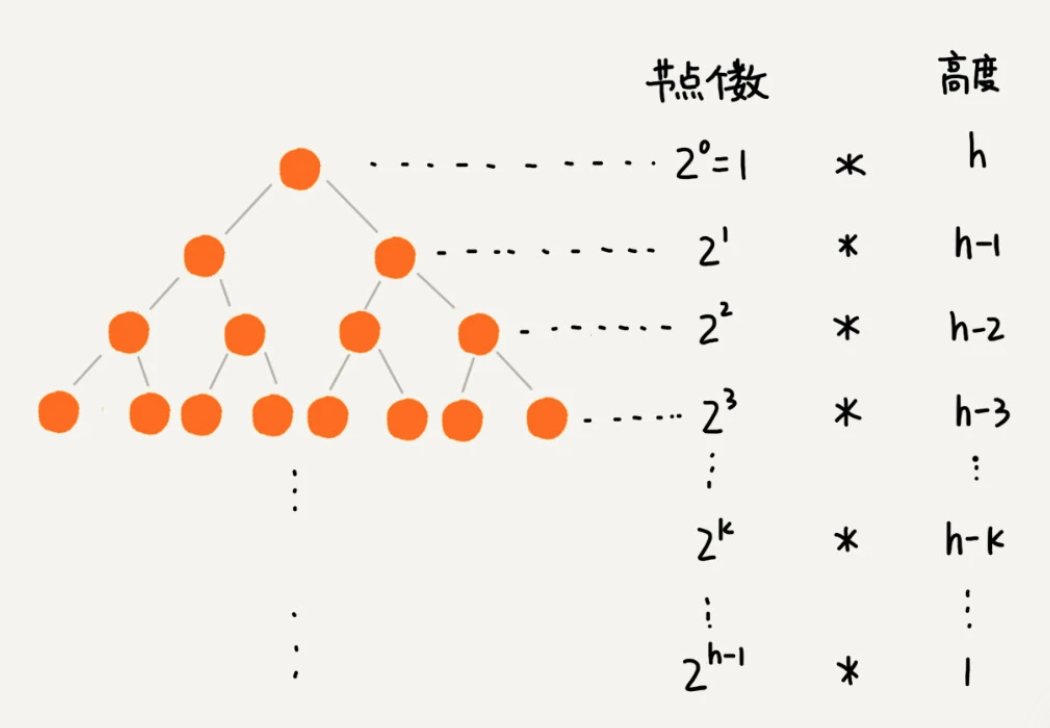

每个非叶子节点的高度求和，就是下面这个公式：
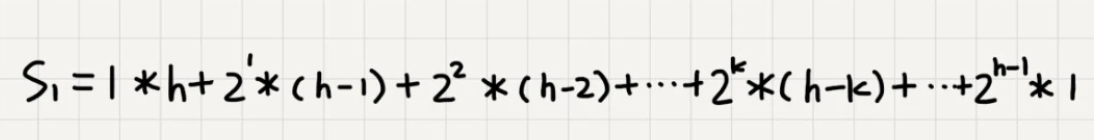

公式左右都乘以 2，就得到另一个公式 S2。我们将 S2 错位对齐，并且用 S2 减去 S1，可以得到 S。
因为 h=log2n，代入公式 S，就能得到 S=O(n)，所以，建堆的时间复杂度就是 O(n)。

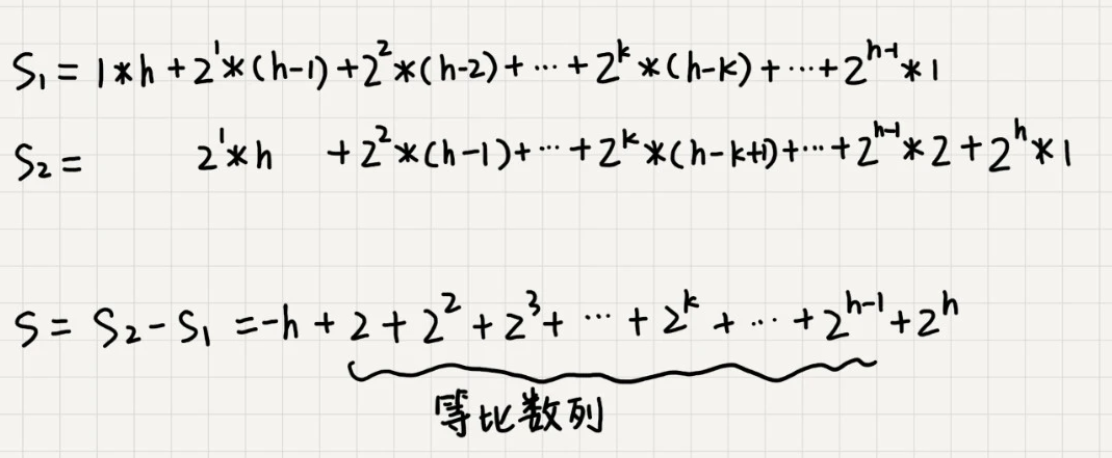

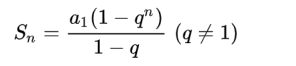

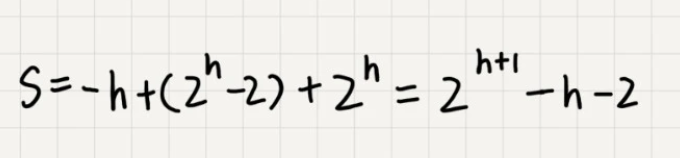

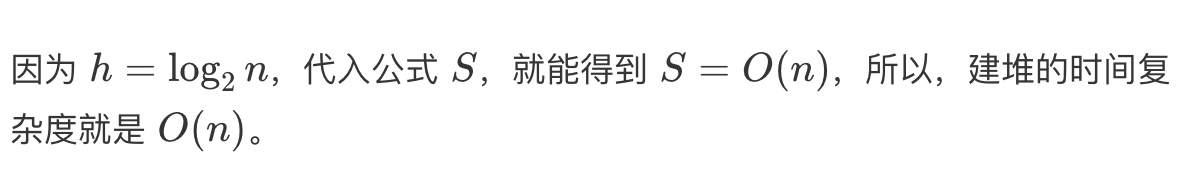


#### 排序

* 建堆过程的时间复杂度是 O(n)，
* 一次堆化 O(logn)，n个元素O(nlogn)， 排序过程的时间复杂度是 O(nlogn)
* 堆排序整体的时间复杂度是 O(nlogn)。

建堆之后，数组中的数据已经按照大顶堆的特性来组织，数组中的第一个元素就是堆顶，即最大的元素

* 把堆顶元素跟最后一个元素交换，则最大元素就放到了 n 的位置
* 类似删除堆顶元素的操作，当堆顶元素移除之后，再通过堆化的方法，将剩下的 n-1个元素重新建堆
* 堆化完成之后，再取堆顶的元素，放到 n-1 的位置
* 一直重复知道只剩下标为1的一个元素，排序完成

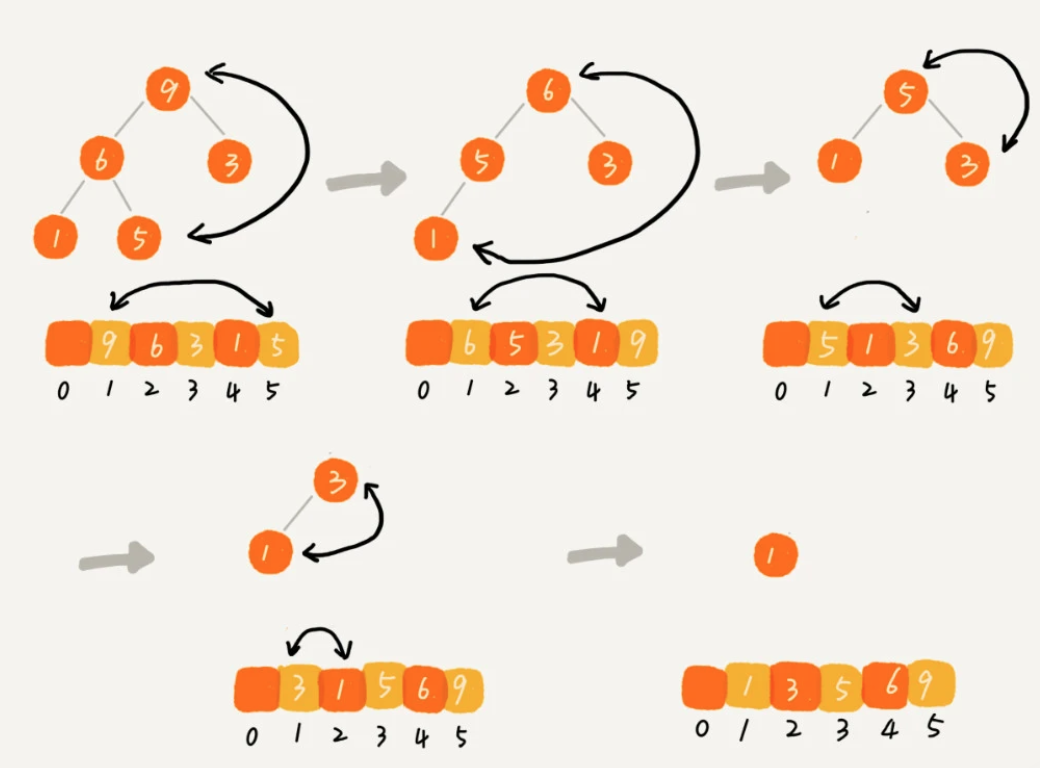

~~~
// n表示数据的个数，数组a中的数据从下标1到n的位置。
public static void sort(int[] a, int n) {
  buildHeap(a, n);
  int k = n;
  while (k > 1) {
    swap(a, 1, k);
    --k;
    heapify(a, k, 1);
  }
}
~~~

In [9]:
from typing import List

def heapSort(a:List[int]):
    maxIndex = len(a)-1 # 完全二叉树索引从1开始，到 len-1 结束
    buildHeap(a, maxIndex)

    k = maxIndex
    while (k > 1) :
        a[1], a[k] = a[k], a[1] # k 上为最大的元素
        k -= 1
        heapify(a, k, 1) # k-1 的元素重新堆化
    

def buildHeap(a, n):
    for i  in range(n//2, 0, -1): # 从最后一个非叶子节点开始重新堆化
        heapify(a, n, i)


def heapify(a, n, i): # n 是需要堆化的元素格式，k 是堆化的子树的顶点的index
    while (True):
        maxPos = i
        if 2*i<=n and a[i] < a[2*i]: maxPos = 2 *i
        if 2*i+1 <=n and a[maxPos] < a[2*i+1]: maxPos = 2*i+1
        if maxPos == i: break

        a[i], a[maxPos] = a[maxPos], a[i]
        i = maxPos
    

#a = [100, 0,4,2,1,5,3]
#a = [100,0,5,4,3,2,1]
a = [100, 0,4,3,2,1,5]
heapSort(a)
print(a)

[100, 0, 1, 2, 3, 4, 5]


In [ ]:
'''
leetcode hard

239 Sliding Window Maximum

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.

 

Example 1:

Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]
Explanation: 
Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7
Example 2:

Input: nums = [1], k = 1
Output: [1]

'''
import heapq
from typing import List, Optional

class Solution:
    def maxSlidingWindow_with_time_limit_exceeded(self, nums: List[int], k: int) -> List[int]:
        res = []
        # 默认情况下，heapq模块实现的是小顶堆，但是可以通过在插入元素时对元素取负值来实现大顶堆的行为。
        maxHeap = []
        
        for i in range(k):
            heapq.heappush(maxHeap, -nums[i])
        
        # heap index 0 为堆顶元素
        res.append(-maxHeap[0])

        for i in range(k, len(nums)):
            # delete very left element in previous round
            maxHeap.remove(-nums[i-k])
            heapq.heapify(maxHeap)
            heapq.heappush(maxHeap, -nums[i])
            res.append(-maxHeap[0])
        
        return res